**Import data using pandas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'G:\My Drive\Analytics\marketing.csv')


## Inspecting data

In [3]:
print(df.head())

      user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel is_retained  
0           NaN           House Ads        True  
1           NaN       

## Checking data types & missing values

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


## Summary Statistics

In [5]:
# To summarize the file 
print(df.describe())

           user_id date_served marketing_channel  variant converted  \
count        10037       10021             10022    10037     10022   
unique        7309          31                 5        2         2   
top     a100000882     1/15/18         House Ads  control     False   
freq            12         789              4733     5091      8946   

       language_displayed language_preferred    age_group date_subscribed  \
count               10037              10037        10037            1856   
unique                  4                  4            7              31   
top               English            English  19-24 years         1/16/18   
freq                 9793               9275         1682             163   

       date_canceled subscribing_channel is_retained  
count            577                1856        1856  
unique           115                   5           2  
top           4/2/18           Instagram        True  
freq              15                 6

# Data Cleaning: Analyzing individual columns & fixing data types


In [6]:
#The column [converted] data type should be boolean not object from the formular ".info"
df['converted'].dtype


dtype('O')

### changing the data type of column [converted] to Boolean

In [7]:
df['converted'].astype('boolean')

0         True
1         True
2         True
3         True
4         True
         ...  
10032     True
10033     True
10034    False
10035     True
10036    False
Name: converted, Length: 10037, dtype: boolean

In [8]:
df['converted']= df['converted'].astype('boolean')
df['converted'].dtype
print('The datatype is {}'.format(df['converted'].dtype))

The datatype is boolean


## checking the column [user_id]

In [9]:
#this checks the length of characters in each of the particular column

id_len = df['user_id'].apply(lambda x:len(x))

df['user_id'].astype(str).str[0].unique()
id_len.unique()



array([10,  9], dtype=int64)

In [10]:
# the above output gave unique numbers of  10 & 9,we need to confirm why this difference or whether it is an error
#lets check the [user_id] that has 9 characters
condition=df['user_id'].str.len()==9

#lets add a dataframe to the variable: df[condition] and referenced to a variable
df_filtered =df[condition]

#lets check the result
df_filtered


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
9944,a10009231,NaN,NaN,control,<NA>,English,English,19-24 years,NaN,NaN,NaN,NaN
9945,a10009232,NaN,NaN,control,<NA>,English,English,24-30 years,NaN,NaN,NaN,NaN
9946,a10009233,NaN,NaN,control,<NA>,English,English,30-36 years,NaN,NaN,NaN,NaN
9947,a10009234,NaN,NaN,control,<NA>,English,English,36-45 years,NaN,NaN,NaN,NaN
9948,a10009235,NaN,NaN,control,<NA>,English,English,45-55 years,NaN,NaN,NaN,NaN
9949,a10009236,NaN,NaN,control,<NA>,English,English,55+ years,NaN,NaN,NaN,NaN
9950,a10009237,NaN,NaN,control,<NA>,English,English,0-18 years,NaN,NaN,NaN,NaN
9951,a10009238,NaN,NaN,control,<NA>,English,English,19-24 years,NaN,NaN,NaN,NaN
9952,a10009239,NaN,NaN,control,<NA>,English,English,24-30 years,NaN,NaN,NaN,NaN
9953,a10009240,NaN,NaN,control,<NA>,English,English,30-36 years,NaN,NaN,NaN,NaN


In [11]:
#after little research,the most significant is the first character of the first variable,so found that if all are the same

df['user_id'].astype('str').str[0].unique()

array(['a'], dtype=object)

**The above output signify that all the [user_id] has their first character to be 'a',this satisfactory for column[user_id]**

## changing the Date Format

In [12]:
#To change the format from from mm/dd/yyy to yyyy-mm-dd

df['date_served'] = pd.to_datetime(
df['date_served'])

df['date_subscribed'] = pd.to_datetime(
df['date_subscribed'])

df['date_canceled'] = pd.to_datetime(
df['date_canceled'])

df['date_canceled']


0              NaT
1              NaT
2              NaT
3              NaT
4              NaT
           ...    
10032   2018-01-24
10033          NaT
10034          NaT
10035          NaT
10036          NaT
Name: date_canceled, Length: 10037, dtype: datetime64[ns]

In [13]:
#creating a new column that signify the day of the week it was served
#could not be converted to int due to null values

df['day_served'] = df['date_served'].dt.dayofweek
#df['date_served'].dt.dayofweek.sort_values(ascending=False)
df['day_served']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10032    2.0
10033    2.0
10034    4.0
10035    2.0
10036    5.0
Name: day_served, Length: 10037, dtype: float64

In [14]:
 # Creating a  weekday  dictionary
weekday_dict={0.0:'Mon', 1.0:'Tues', 2.0:'Wed', 3.0:'Thu', 4.0:'Fri', 5.0:'Sat', 6.0:'Sun'}
    
# Then map the weekday dict to the created day_sered
df['day_served'] = df['day_served'].map(weekday_dict)
df['day_served'].dropna()


0        Mon
1        Mon
2        Mon
3        Mon
4        Mon
        ... 
10032    Wed
10033    Wed
10034    Fri
10035    Wed
10036    Sat
Name: day_served, Length: 10021, dtype: object

## working with the age group column

In [15]:
#To remove  a particular string in a variable say like(50 years to 50)
df['age_group'] = df['age_group'].str.replace(" years","")
df['age_group'].head(3)


0     0-18
1    19-24
2    24-30
Name: age_group, dtype: object


## Checking if language displayed is same as language preferred




In [16]:
df['is_language_correct']=(df['language_displayed']==df['language_preferred'])
print("Language is not correct for {} observations".format(df['is_language_correct'].count()-df['is_language_correct'].sum()))
 
#* count()-counts the number of not empty values for each row, or column
#*sum() - Getting the frequency of a specific value/true values



Language is not correct for 522 observations


# Exploratory analysis

## How many users see marketing assets?

In [17]:
# Aggregate unique users that see ads by date,nunique() is used in order to avoid duplicates user_id which is unique
daily_users = df.groupby(['date_served'])['user_id'].nunique()
print(daily_users.head(5))

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


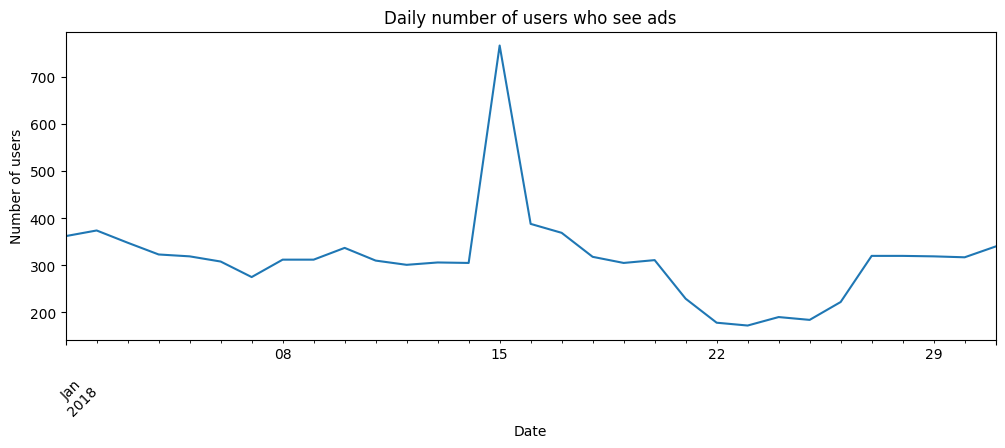

In [18]:
#visualizing the result


# Annotate

plt.figure(figsize=(12,4))
plt.title('Daily number of users who see ads')
daily_users.plot()
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.xticks(rotation = 45)
plt.show()


## Total Number Of Marketing Channel used within the month

In [19]:
channel_count=df['marketing_channel'].value_counts(sort=True,ascending=False)
channel_count

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

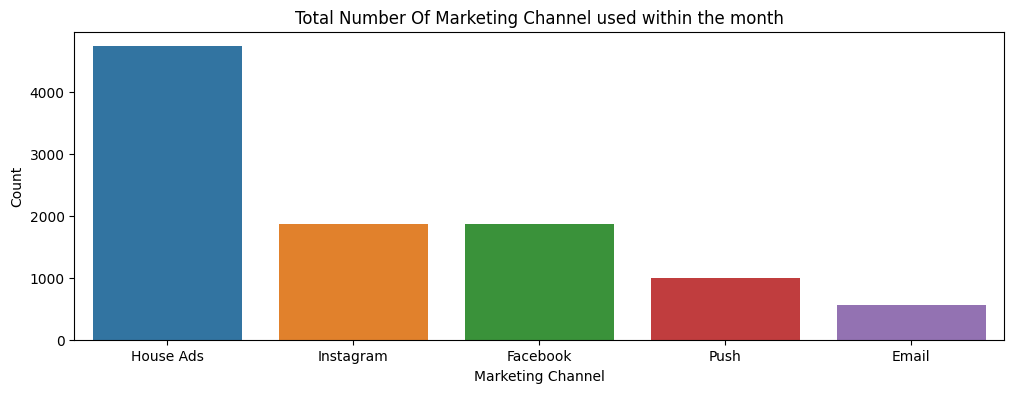

In [20]:
# lets Visualize it
plt.figure(figsize=(12, 4))#The figsize attribute allows us to specify the width and height of a figure in-unit inches
sns.barplot(x=channel_count.index, y=channel_count.values)
plt.xlabel("Marketing Channel")
plt.ylabel("Count")
plt.title("Total Number Of Marketing Channel used within the month", fontsize=12)
plt.show()

